In [3]:
# Librerias
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

# The First Fundamental Form; Area

### Example 4
We shall compute the first fundamental form of a sphere at a point of the coordinate neighborhood given by the parametrization.

$$X(\theta,\phi) = (sin(\theta)cos(\phi),sin(\theta)sin(\phi), cos(\theta))$$

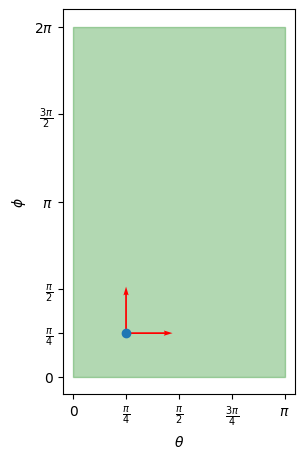

In [4]:
## Demostrar theta y ph
thetad = np.linspace(0,np.pi)
phid = 2*np.pi*np.ones(len(thetad))

theta0 = np.pi/4
phi0 = np.pi/4

plt.figure(figsize=(3,5))
plt.fill_between(thetad, phid, color='g', alpha=0.3)
plt.quiver(np.pi/4, np.pi/4, 1,0,scale=5,color='red')
plt.quiver(np.pi/4,np.pi/4,0,1,scale=5,color='red')
plt.xticks([0,np.pi/4,np.pi/2, 3*np.pi/4, np.pi],
           [0,r'$\frac{\pi}{4}$', r'$\frac{\pi}{2}$', r'$\frac{3\pi}{4}$', r'$\pi$'])
plt.yticks([0,np.pi/4,np.pi/2, np.pi, 3*np.pi/2, 2*np.pi],
           [0,r'$\frac{\pi}{4}$', r'$\frac{\pi}{2}$', r'$\pi$', r'$\frac{3\pi}{2}$', r'$2\pi$'])
plt.scatter(theta0,phi0)
plt.xlabel(r'$\theta$')
plt.ylabel(r'$\phi$')
plt.show()

In [5]:
# Defino como variables que van a obtener datos
theta,phi = sp.symbols('theta, phi', reals = True, positive = True)

Aca definimos la parametricación anterior:
$$X(\theta,\phi) = (sin(\theta)cos(\phi),sin(\theta)sin(\phi), cos(\theta))$$

In [6]:
x = sp.sin(theta)*sp.cos(phi)
y = sp.sin(theta)*sp.sin(phi)
z = sp.cos(theta)
X = (x,y,z)
print(r"X(\theta,\phi) =", X)

X(\theta,\phi) = (sin(theta)*cos(phi), sin(phi)*sin(theta), cos(theta))


Se va a Contruir el mapeo dferencial $d\vec{X}_p()$, donde tomamos la derivadas con respecto a $\theta$ y respeto $\phi$ despues de hacer una tranformación con la base:
* $X_{\theta}(\theta,\phi) = (cos(\theta)cos(\phi),cos(\theta)sin(\phi), -sin(\theta)) $
* $X_{\phi}(\theta,\phi) = (-sin(\theta)sin(\phi),sin(\theta)cos(\phi), 0) $

In [7]:
# Se Contriye el mapeo
dX = [[sp.diff(x,theta), sp.diff(x,phi)], [sp.diff(y,theta), sp.diff(y,phi)],[sp.diff(z,theta), sp.diff(z,phi)]]
print('dX =', dX)

dX = [[cos(phi)*cos(theta), -sin(phi)*sin(theta)], [sin(phi)*cos(theta), sin(theta)*cos(phi)], [-sin(theta), 0]]


In [8]:
# Aplicamos transformación a los elemento de la Base
dx_theta = np.matmul(dX, [1,0])
print(r"dX/d\theta", dx_theta)

dX/d\theta [cos(phi)*cos(theta) sin(phi)*cos(theta) -sin(theta)]


In [9]:
# Aplicamos transformación a los elemento de la Base
dx_phi = np.matmul(dX, [0,1])
print(r"dX/d\phi", dx_phi)

dX/d\phi [-sin(phi)*sin(theta) sin(theta)*cos(phi) 0]


Ahora, verificamos que 

$$d\vec{X}_p(e_1) = \frac{d\vec{X}}{d\theta} = \vec{X}_\theta$$

y

$$d\vec{X}_p(e_2) = \frac{d\vec{X}}{d\phi} = \vec{X}_\phi$$

In [10]:
## Para theta
print(dx_theta)
[sp.diff(x,theta), sp.diff(y, theta), sp.diff(z,theta)]
dx_theta - [sp.diff(x,theta), sp.diff(y, theta), sp.diff(z,theta)]

[cos(phi)*cos(theta) sin(phi)*cos(theta) -sin(theta)]


array([0, 0, 0], dtype=object)

In [11]:
## Para phi 
print(dx_phi)
[sp.diff(x,phi), sp.diff(y, phi), sp.diff(z,phi)]
dx_phi - [sp.diff(x,phi), sp.diff(y, phi), sp.diff(z,phi)]

[-sin(phi)*sin(theta) sin(theta)*cos(phi) 0]


array([0, 0, 0], dtype=object)

Ahora examinamos el mapeo sobre un punto particular $p=\left(\frac{\pi}{2}, 0\right)$
* $\vec{X}_p$

In [12]:
(X[0].subs(theta, np.pi/2).subs(phi,0).round(2),X[1].subs(theta, np.pi/2).subs(phi,0).round(2),X[2].subs(theta, np.pi/2).subs(phi,0).round(2))

(1.00000000000000, 0, 0.0)

* $\vec{X}_\theta(p)$

In [13]:
(dx_theta[0].subs(theta, np.pi/2).subs(phi,0).round(2),dx_theta[1].subs(theta, np.pi/2).subs(phi,0).round(2),dx_theta[2].subs(theta, np.pi/2).subs(phi,0).round(2))

(0.0, 0, -1.00000000000000)

* $\vec{X}_\phi$

In [14]:
(dx_phi[0].subs(theta, np.pi/2).subs(phi,0).round(2),dx_phi[1].subs(theta, np.pi/2).subs(phi,0).round(2),dx_phi[2].subs(theta, np.pi/2).subs(phi,0).round(2))

(0, 1.00000000000000, 0)

Verfico que $\{\vec{X}_\theta, \vec{X}_\phi\}$ es una base ortogonal

In [15]:
np.dot(dx_theta, dx_phi)

0

##### Vemos la base del plano tangente

In [16]:
theta0 = np.pi/4
phi0 = np.pi/4
dx_theta0 = (dx_theta[0].subs(theta,theta0).subs(phi,phi0), dx_theta[1].subs(theta,theta0).subs(phi,phi0), dx_theta[2].subs(theta,theta0).subs(phi,phi0))
dx_phi0 = (dx_phi[0].subs(theta,theta0).subs(phi,phi0), dx_phi[1].subs(theta,theta0).subs(phi,phi0), dx_phi[2].subs(theta,theta0).subs(phi,phi0))

print(r'$dX_\theta_0$ = ', dx_theta0)
print(r'$dX_\phi_0$ = ', dx_phi0)

$dX_\theta_0$ =  (0.500000000000000, 0.500000000000000, -0.707106781186547)
$dX_\phi_0$ =  (-0.500000000000000, 0.500000000000000, 0)


GRaficamos la superficie y la imagen de un punto con la imagen de sus vectores tangentes

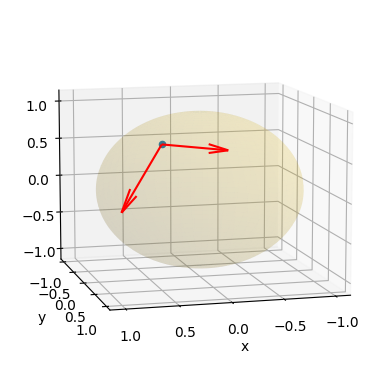

In [17]:
def sphere(r):
  u = np.linspace(0,2*np.pi, 200)
  v = np.linspace(0,np.pi,200)
  d = r*np.outer(np.cos(u), np.sin(v))
  e = r*np.outer(np.sin(u), np.sin(v))
  g = r*np.outer(np.ones(np.size(u)), np.cos(v))
  return d,e,g

fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
plt.xticks([-1,-0.5,0,0.5,1])
plt.yticks([-1,-0.5,0,0.5,1])
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zticks([-1,-0.5,0,0.5,1])
d,e,g = sphere(1)
ax.plot_surface(d,e,g,color=(1,0.8,0,0.1))
ax.scatter(sp.sin(theta0)*sp.cos(phi0), sp.sin(theta0)*sp.sin(phi0), sp.cos(theta0))
ax.view_init(elev=10, azim=75)
ax.quiver(sp.sin(theta0)*sp.cos(phi0), sp.sin(theta0)*sp.sin(phi0), sp.cos(theta0), dx_theta0[0], dx_theta0[1], dx_theta0[2], color=(1,0,0,1))
ax.quiver(sp.sin(theta0)*sp.cos(phi0), sp.sin(theta0)*sp.sin(phi0), sp.cos(theta0), dx_phi0[0], dx_phi0[1], dx_phi0[2], color=(1,0,0,1))
plt.show()

## Graficamos juntas

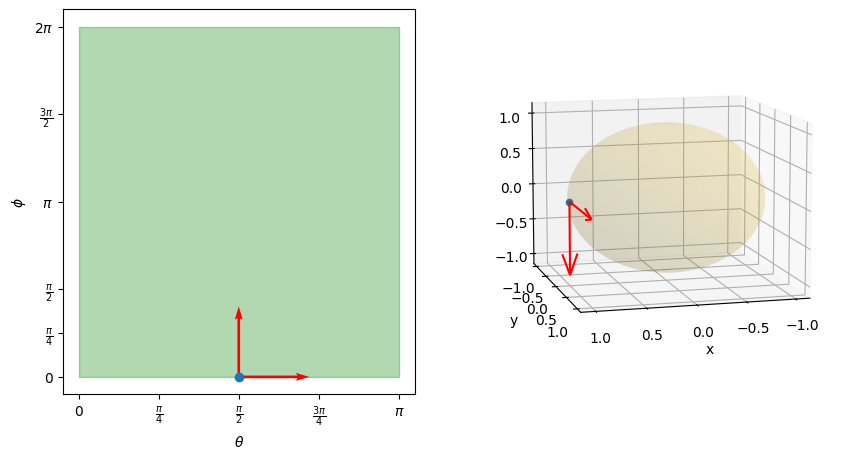

In [18]:
theta0 = np.pi/2
phi0 = 0

dx_theta0 = (dx_theta[0].subs(theta,theta0).subs(phi,phi0), dx_theta[1].subs(theta,theta0).subs(phi,phi0), dx_theta[2].subs(theta,theta0).subs(phi,phi0))
dx_phi0 = (dx_phi[0].subs(theta,theta0).subs(phi,phi0), dx_phi[1].subs(theta,theta0).subs(phi,phi0), dx_phi[2].subs(theta,theta0).subs(phi,phi0))

fig = plt.figure(figsize=(10,5))

ax = fig.add_subplot(121)
plt.fill_between(thetad, phid, color='g', alpha=0.3)
plt.quiver(theta0, phi0, 1,0,scale=5,color='red')
plt.quiver(theta0,phi0,0,1,scale=5,color='red')
plt.xticks([0,np.pi/4,np.pi/2, 3*np.pi/4, np.pi],
           [0,r'$\frac{\pi}{4}$', r'$\frac{\pi}{2}$', r'$\frac{3\pi}{4}$', r'$\pi$'])
plt.yticks([0,np.pi/4,np.pi/2, np.pi, 3*np.pi/2, 2*np.pi],
           [0,r'$\frac{\pi}{4}$', r'$\frac{\pi}{2}$', r'$\pi$', r'$\frac{3\pi}{2}$', r'$2\pi$'])
plt.scatter(theta0,phi0)
plt.xlabel(r'$\theta$')
plt.ylabel(r'$\phi$')

ax = fig.add_subplot(122,projection='3d')
plt.xticks([-1,-0.5,0,0.5,1])
plt.yticks([-1,-0.5,0,0.5,1])
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zticks([-1,-0.5,0,0.5,1])
d,e,g = sphere(1)
ax.plot_surface(d,e,g,color=(1,0.8,0,0.1))
ax.scatter(sp.sin(theta0)*sp.cos(phi0), sp.sin(theta0)*sp.sin(phi0), sp.cos(theta0))
ax.view_init(elev=10, azim=75)
ax.quiver(sp.sin(theta0)*sp.cos(phi0), sp.sin(theta0)*sp.sin(phi0), sp.cos(theta0), dx_theta0[0], dx_theta0[1], dx_theta0[2], color=(1,0,0,1))
ax.quiver(sp.sin(theta0)*sp.cos(phi0), sp.sin(theta0)*sp.sin(phi0), sp.cos(theta0), dx_phi0[0], dx_phi0[1], dx_phi0[2], color=(1,0,0,1))
plt.show()

Obtenemos los coeficientes de la primera forma fundamental: 
$$E(\theta,\phi) = < X_{\theta}, X_{\theta} > = 1$$
$$F(\theta,\phi) = < X_{\theta}, X_{\phi} > = 0$$
$$G(\theta,\phi) = < X_{\phi}, X_{\phi} > = sin^{2}\theta$$

In [19]:
E = np.dot(dx_theta, dx_theta).simplify()
print(E)

1


In [20]:
F = np.dot(dx_theta, dx_phi).simplify()
print(F)

0


In [21]:
G = np.dot(dx_phi, dx_phi).simplify()
print(G)

sin(theta)**2


Funcion de area

$$dA = \sqrt{EG-F^2}$$

In [22]:
dA = sp.sqrt(E*G-F**2)
dA

Abs(sin(theta))

Area de la esfera

$$A(S^2) = \iint_u \sqrt{EG-F^2}d\phi d\theta = \int_0^\pi \int_0^{2\pi} sin\theta d\phi d\theta$$

In [23]:
sp.integrate(dA, (theta,0,sp.pi), (phi,0,2*sp.pi))

4*pi

Longitud de arco

$$S = \int_{t_0}^{t_f} \sqrt{E(\theta')^2 + 2F(\theta'\phi') + G(\phi')^2} dt = \int_{t_0}^{t_f} \sqrt{(\theta')^2 + sin^2\theta(\phi')^2} dt$$

Inicialmente en el ecuador

$$\theta = \frac{\pi}{2},\ 0<\phi<2\pi$$

$$S = \int_{t_0}^{t_f} \sqrt{E(\theta')^2 + 2F(\theta'\phi') + G(\phi')^2} dt = \int_{t_0}^{t_f} \sqrt{G(\phi')^2} dt = \int_{\phi_0}^{\phi_f} \sqrt{G} d\phi = \int_0^{2\pi} sin\left(\frac{\pi}{2}\right) d\phi = 2\pi$$

In [24]:
th = np.pi/2
phis = sp.symbols('phis')
ad = sp.sqrt(E*(sp.diff(th))**2 + 2*F*sp.diff(th)*sp.diff(phis) + G.subs(theta,th))
sp.integrate(ad, (phi,0,2*sp.pi))


2.0*pi

## Curves of Loxodromes

let us determine the curves in this coordinate neighborhood
of the sphere which make a constant angle β with the meridians
ϕ = const. These curves are called loxodromes (rhumb lines) of the sphere.

At the point x(θ, ϕ) where the curve meets the
meridian ϕ = const., we have

$$\alpha'(t) = \vec{X}_{\theta}\theta' + \vec{X}_{\phi}\phi' $$

$$cos(\beta) = \frac{<x_{\theta}, \alpha'(t)>}{|x_{\theta}||\alpha'(t)|} = \frac{\theta'}{\sqrt{(\theta')^{2}+(\phi')^{2}sin^{2}\theta} }$$

obteniendo,

$$\frac{\theta'}{sin\theta} = \frac{\phi'}{tan\beta}$$

Al integrar obenemos:
$$log( tan (\frac{\theta}{2}) )= (\phi+c)cota\beta$$

Se puede ver el problema en como hallar la curva que hace un angulo $\beta$ con los meridianos y pase por $\theta_{0}$,$\phi_{0}$
 $$c = log( tan (\frac{\theta}{2}) ) tan\beta - \phi$$

 ### Solución Analitica


In [25]:
x = sp.symbols('x')
f = sp.Function('f')

Se quiere intentar integrar:
$$\int \frac{f'(x)}{sin(f(x))}$$ 

In [26]:
F = f(x).diff(x)/sp.sin(f(x))
print('Funcion', F)

Funcion Derivative(f(x), x)/sin(f(x))


Ahora realizamos la integración

In [27]:
sp.integrate(F)

Integral(Derivative(f(x), x)/sin(f(x)), x)

Si derivo la solución:

$$\frac{d}{dx} log( tan (\frac{f(x)}{2}) ) = \frac {f'(x)}{sin(f(x))}$$

In [28]:
g = sp.log(sp.tan(f(x)/2))

print('Solucion:', g)

Solucion: log(tan(f(x)/2))


In [29]:
sp.diff(g).simplify()

Derivative(f(x), x)/sin(f(x))

### Parametros de la curva loxodrómica
$$log( tan (\frac{\theta}{2}) )= (\phi+c)cota\beta$$
$$c = log( tan (\frac{\theta}{2}) ) tan\beta - \phi$$

In [30]:
# Condiciones para reemplazar
beta = np.pi/3
theta0 = np.pi/4
phi0 = np.pi/2

# Remplazo para encontrar la constante c
c = sp.log(sp.tan(theta0/2))*sp.tan(beta)-phi0

print('c = ', c.round(2))

c =  -3.10


$$\phi = log( tan (\frac{\theta}{2}) ) tan\beta - c$$

In [31]:
# Condiciones para reemplazar
beta = np.pi/3
theta0 = np.pi/4

# Remplazo para encontrar la constante c
phies = sp.log(sp.tan(theta0/2))*sp.tan(beta)-c

print('phi = ', phies )

phi =  1.57079632679490


## Curva Loxodrómica
$$log( tan (\frac{\theta}{2}) )= (\phi+c)cota\beta$$
$$c = log( tan (\frac{\theta}{2}) ) tan\beta - \phi$$
$$\phi = log( tan (\frac{\theta}{2}) ) tan\beta - c$$


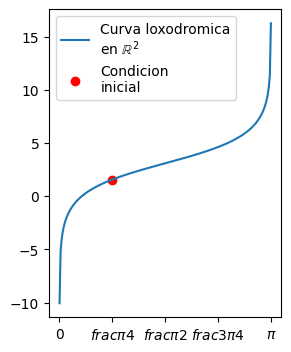

In [32]:
e1 = 1e-3 #La parametrizacion no esta definida en los polos
thetads = np.linspace(0 + e1, np.pi - e1, 200)
phids = np.log(np.tan(thetads/2))*np.tan(beta) - c
phids = phids.astype(float)

plt.figure(figsize=(3,4))
plt.plot(thetads,phids, label = "Curva loxodromica\nen $\mathbb{R}^{2}$")
plt.scatter(theta0,phi0, color = "red", label= "Condicion\ninicial")
plt.legend()
plt.xticks([0, np.pi/4, np.pi/2, 3*np.pi/4, np.pi],
           [0,r"$frac{\pi}{4}$", r"$frac{\pi}{2}$",r"$frac{3\pi}{4}$",r"$\pi$" ])
plt.show()

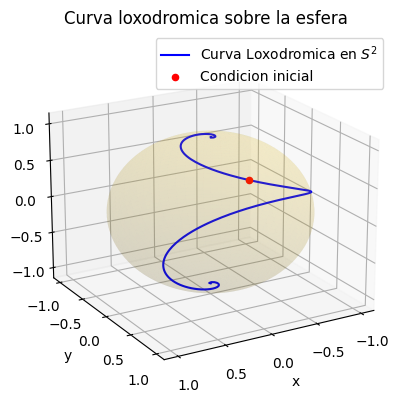

In [33]:
def sphere(r):
    u = np.linspace(0,2*np.pi,200)
    v = np.linspace(0,np.pi,200)
    d = (r)*np.outer(np.cos(u), np.sin(v))
    e = (r)*np.outer(np.sin(u), np.sin(v))
    g = (r)*np.outer(np.ones(np.size(u)), np.cos(v))
    return d,e,g

x0 = np.sin(theta0)*np.cos(phi0)
y0 = np.sin(theta0)*np.sin(phi0)
z0 = np.cos(theta0)


x = np.sin(thetads)*np.cos(phids)
y = np.sin(thetads)*np.sin(phids)
z = np.cos(thetads)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
plt.xticks([-1,-0.5,0,0.5,1])
plt.yticks([-1,-0.5,0,0.5,1])
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zticks([-1,-0.5,0,0.5,1])
ax.plot(x,y,z, color = "blue", label="Curva Loxodromica en $S^{2}$")
ax.scatter(x0,y0,z0, color = "red", label = "Condicion inicial")
d,e,g = sphere(1)
ax.plot_surface(d,e,g, rstride = 3, cstride = 3, color = (1,0.8,0,0.1))
ax.set_title("Curva loxodromica sobre la esfera")
ax.view_init(elev = 20, azim = 60)
ax.legend()
plt.show()

In [36]:
def loxo(the0, phi0, betas, elev, azim):
    c = sp.log(sp.tan(the0/2))*sp.tan(betas)-phi0
    epsilon = 1e-3
    thed = np.linspace(0 + epsilon, np.pi - epsilon, 200)
    phd = np.log(np.tan(thed/2))*np.tan(betas) - c
    phd = phd.astype(float)

    x0 = np.sin(the0)*np.cos(phi0)
    y0 = np.sin(the0)*np.sin(phi0)
    z0 = np.cos(the0)


    x = np.sin(thed)*np.cos(phd)
    y = np.sin(thed)*np.sin(phd)
    z = np.cos(thed)

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    plt.xticks([-1,-0.5,0,0.5,1])
    plt.yticks([-1,-0.5,0,0.5,1])
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_zticks([-1,-0.5,0,0.5,1])
    ax.plot(x,y,z, color = "blue", label="Curva Loxodromica en $S^{2}$")
    ax.scatter(x0,y0,z0, color = "red", label = "Condicion inicial")
    d,e,g = sphere(1)
    ax.plot_surface(d,e,g, rstride = 3, cstride = 3, color = (1,0.8,0,0.1))
    ax.set_title("Curva loxodromica sobre la esfera")
    ax.view_init(elev=elev, azim=azim)
    ax.legend()
    plt.show()

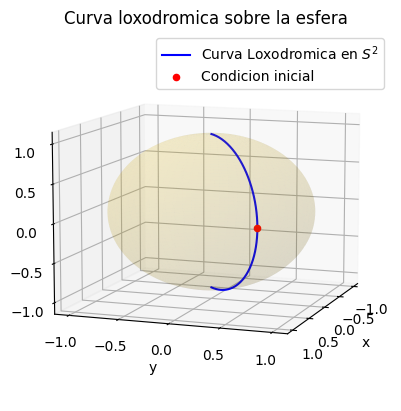

In [37]:
loxo(np.pi/2,np.pi/4,0,10,20)